<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/BERTopic_Model_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [260]:
import string

In [261]:
import nltk

In [262]:
%pip install umap-learn

In [263]:
%pip install HDBSCAN

In [264]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unlabelled Discussion DATA.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1194 non-null   object        
 4   Body Text            929 non-null    object        
 5   Top Comment          91 non-null     object        
 6   Top Comment Reply 1  25 non-null     object        
 7   Top Comment Reply 2  10 non-null     object        
 8   Top Comment Reply 3  0 non-null      float64       
 9   Top Comment Reply 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 93.9+ KB


In [265]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1194 non-null   object        
 4   Body Text            929 non-null    object        
 5   Top Comment          91 non-null     object        
 6   Top Comment Reply 1  25 non-null     object        
 7   Top Comment Reply 2  10 non-null     object        
 8   Top Comment Reply 3  0 non-null      float64       
 9   Top Comment Reply 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 93.9+ KB


In [266]:
data = df

In [267]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,NaN,NaN,NaN,NaN,NaN


In [268]:
n = len(data)

In [269]:
data.drop(['Date', 'Datetime'], axis=1)


,subReddit,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,Frustrated with Libre 3,I just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1195,diabetes_t2,Morning Spikes,Anyone else get 60/70 point increases in the m...,NaN,NaN,NaN,NaN,NaN
1196,diabetes_t2,This is what severe anxiety does to my blood s...,I did not eat any carbs with either of those ...,NaN,NaN,NaN,NaN,NaN
1197,diabetes,I tried having it on my arm just once as sugge...,The filament bent like 15 minutes after I've p...,NaN,NaN,NaN,NaN,NaN
1198,diabetes,"Mine keeps breaking, on my right arm.",I have had 3 break and stop reading.,NaN,NaN,NaN,NaN,NaN


In [270]:
#stage 1 lowercase
data['Title'] = data['Title'].str.lower()
data['Body Text'] = data['Body Text'].str.lower()
data['Top Comment'] = data['Top Comment'].str.lower()
data['Top Comment Reply 1'] = data['Top Comment Reply 1'].str.lower()
data['Top Comment Reply 2'] = data['Top Comment Reply 2'].str.lower()
#data['Top Comment Reply 3'] = data['Top Comment Reply 3'].str.lower()
#data['Top Comment Reply 4'] = data['Top Comment Reply 4'].str.lower()

In [271]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,NaN,NaN,NaN,NaN,NaN


In [272]:
data.fillna('', inplace=True)
data['Discussion'] = data.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)

In [273]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way to get a cgm without insurance? w...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre 3 doesn’t stick i’ve used the libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre 3 i just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre 3 graphs 3 weeks in the first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused by gmi on libre 3 i'm finding myself ...


In [274]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)

    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text

In [275]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))

In [391]:
#stage 5: removal of numbers and other incoherent chars
def remove_numbers(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
    return text


In [277]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_numbers(x) if isinstance(x, str) else x)

In [278]:
data = data[data['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [398]:
EDA_DF = data

In [399]:
EDA_DF

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Contains_Keywords,Topic
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well ...,True,3
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn’ stick ’ used the libre for mon...,False,3
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone...,False,1
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was fir...,False,-1
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused gmi libre finding myself confused...,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,diabetes_t2,2024-01-16 00:00:00,2024-01-16 01:58:00,morning spikes,anyone else get 60/70 point increases in the m...,,,,,,morning spikes anyone else get point increase...,False,1
1193,diabetes_t2,2024-01-17 00:00:00,2024-01-17 04:09:00,this is what severe anxiety does to my blood s...,i did not eat any carbs with either of those ...,,,,,,this what severe anxiety does blood sugar ...,False,1
1194,diabetes,2024-01-16 00:00:00,2024-01-16 09:22:00,i tried having it on my arm just once as sugge...,the filament bent like 15 minutes after i've p...,,,,,,tried having arm just once suggested the...,False,-1
1195,diabetes,2024-01-16 00:00:00,2024-01-16 08:45:00,"mine keeps breaking, on my right arm.",i have had 3 break and stop reading.,,,,,,mine keeps breaking right arm have had bre...,False,2


In [408]:
keywords = ['prescription', 'pay', 'walmart', 'walgreens', 'fda', 'restrictions', 'tandem', 'insurance', 'cgm insurance']
pattern = '|'.join(keywords)  #patterns
EDA_DF['Contains_Keywords'] = EDA_DF['Discussion'].str.contains(pattern, case=False)

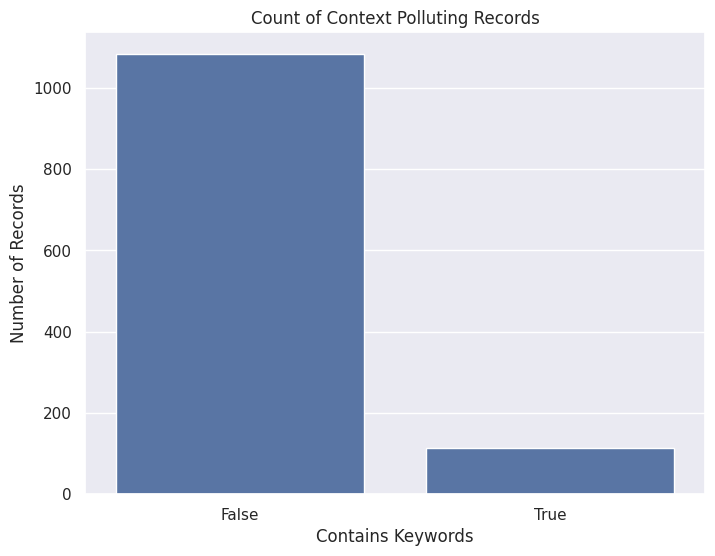

In [409]:
#data['Contains_Keywords'] = data['Discussion'].str.contains(pattern, case=False)
#data['Contains_Keywords'] = data['Discussion'].apply(lambda x: "prescription" in x or "pay" in x or "walmart" in x or "walgreens" in x or "fda" in x or "restrictions" in x or "pcp" in x or "tandem" in x )

#count of records containing either "prescription" or "pay"
plt.figure(figsize=(8, 6))
sns.countplot(x='Contains_Keywords', data=EDA_DF)
plt.title('Count of Context Polluting Records')
plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

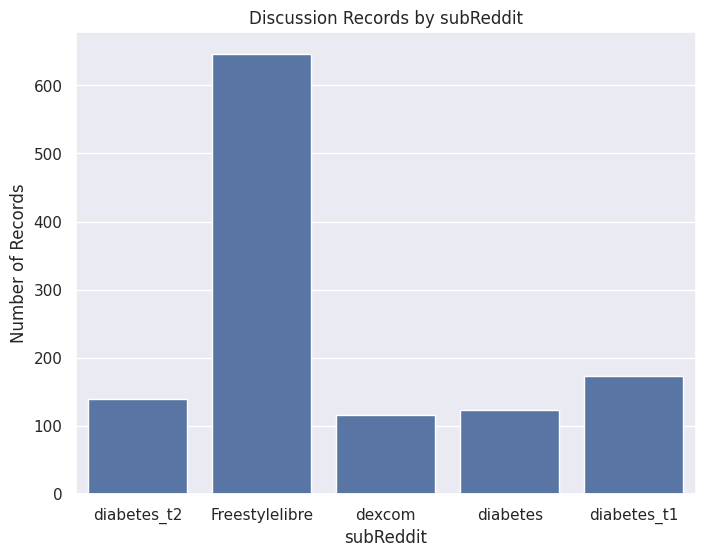

In [410]:
plt.figure(figsize=(8, 6))
sns.countplot(x='subReddit', data=EDA_DF)
plt.title('Discussion Records by subReddit')
#plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

# **UMAP for Dimensionality Reduction & HDBSCAN for Clustering of topics**
Sub-models

In [280]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.02, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=20, min_samples=10,
                        prediction_data=True, gen_min_span_tree=True, metric = 'euclidean')

In [281]:
%pip install bertopic

In [282]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [283]:
from tqdm.auto import tqdm

In [284]:
n = len(data)

In [285]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


# **Stopwords Removal**

In [359]:
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english')) + ['prescription','abbott','abott','pay','month','medicare', 'cgms', 'fda', 'patients', 'voucher', 'doctor', 'dex', 'authorization', 'cost', 'service','medical','covered','freestyle','company','tempo','glucose','cover','mgdl','endo','reading','lot','wanting','want','hours','months','readings','question','since','day','night','first','last','started','ago','dont','using','use','pump','sensor','sensors','working','loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck','the','http', 'https', 'amp', 'com', 'one', 'libre', 'dexcom', 'www', 'anyone', 'can', 'CVS', 'insurance', 'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to', 'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else','anybody','wait','blood','also','insulin','know','still','feel','low','high','got','thank','thanks','think','numbers','stick','going','check','about','even','too','always','much','be','how']
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

# **Embedding**

In [287]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))
texts = data['Discussion'].tolist()


In [288]:
#texts

In [289]:
batch_size=15

In [360]:
 for i in tqdm(range(0,n,batch_size)):
     i_end = min(i+batch_size,n)
     batch = data['Discussion'].iloc[i:i_end].tolist()
     batch_embed = embedding_model.encode(batch)
     embeds[i:i_end,:] = batch_embed

  0%|          | 0/80 [00:00<?, ?it/s]

# **Label Generation using additional Representation Models**
(LLAMA2)

In [291]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration
from transformers import pipeline

In [292]:
%pip install openai

In [293]:
import openai

ImportError: cannot import name 'Iterator' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

In [351]:
# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

#Text Generation with google flan
#generator = pipeline('text2text-generation', model='google/flan-t5-base')
#gflan = TextGeneration(generator)

#client = openai.OpenAI(api_key="sk-...")#put api key here
#chat_GPT = OpenAI(client, model="gpt-3.5-turbo", delay_in_seconds=10, chat=True)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    #"Google flan t5": gflan,
    "MMR": mmr,
    #"ChatGPT": chat_GPT
}

In [ ]:
# # Create your representation model
# generator = pipeline('text2text-generation', model='google/flan-t5-base')
# representation_model = TextGeneration(generator)

In [ ]:
#prompt = f"I have a topic represented by the following list of keywords: {keyword}. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, where these keywords are from Reddit posts about Continuous Glucose Monitoring sensors, which Diabetics use to help them manage their condition; Summarise the specific nuance described by the representation."

In [ ]:
# prompt = """
# I have a topic that contains the following documents:
# [DOCUMENTS]
# The topic is described by the following keywords: [KEYWORDS]

# Based on the information above, extract a short topic label in the following format:
# topic: <topic label>
# """

# **BERTopic Model**
---
Train, add sub-models, tune hyperparameters below


In [361]:
BERTopic_model = BERTopic(
    #sub-models:
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    #hyper-parameters:
    min_topic_size = 80,#careful with tuning this parameter
    top_n_words=15,
    nr_topics= 8,
    language='english',
    calculate_probabilities=True,
    verbose=True,

)
#model.fit(data['Discussion'])
#topics, probs = model.fit_transform(data['Discussion'])

#Train model:
topics, probs = BERTopic_model.fit_transform(texts, embeddings=embeds)

2024-01-20 13:57:15,730 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-20 13:57:19,695 - BERTopic - Dimensionality - Completed ✓
2024-01-20 13:57:19,696 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-20 13:57:19,778 - BERTopic - Cluster - Completed ✓
2024-01-20 13:57:19,780 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-20 13:57:21,270 - BERTopic - Representation - Completed ✓
2024-01-20 13:57:21,273 - BERTopic - Topic reduction - Reducing number of topics
2024-01-20 13:57:22,256 - BERTopic - Topic reduction - Reduced number of topics from 17 to 8


In [362]:
for i in range(5):
    print(f"{topics[i]}: {data['Discussion'][i]}")

3: cheapest way  get  cgm without insurance well after being told  insurance would cover  freestyle libre   just received  letter  the mail telling  that  dont qualify for any cgm because  dont take insulin

 really like  figure out  actual highs and lows instead  random guessing about timing and get  better idea  exactly how each food  hitting  and what  dawn phenomenon looks like through the night 

 looks like  freestyle libre   about  which means month  cant afford that  know you can get your first one for free through their website but does anyone know any other ways  reduce the cost even   can only   temporarily maybe  can get  few months worth  data   the  michigan 
3: libre  doesn’ stick ’ used the libre  for  months off and   wish  had   more consistently but ’ never had  unit stay  more than  days ’ been  frustrating they’ never come off because  any force  accident they just become loose 

’ pregnant now and would like   able  wear  cgm for the duration   pregnancy what give

In [363]:
BERTopic_model.visualize_barchart()

In [364]:
BERTopic_model.visualize_hierarchy()

In [365]:
#run this cell if rows are removed in NLP text cleaning, the index needs to be reset for visualize_documents() function to work
data.reset_index(drop=True, inplace=True)

In [366]:
BERTopic_model.visualize_documents(data['Discussion'], embeddings=embeds)

<Axes: ylabel='$\\lambda$ value'>

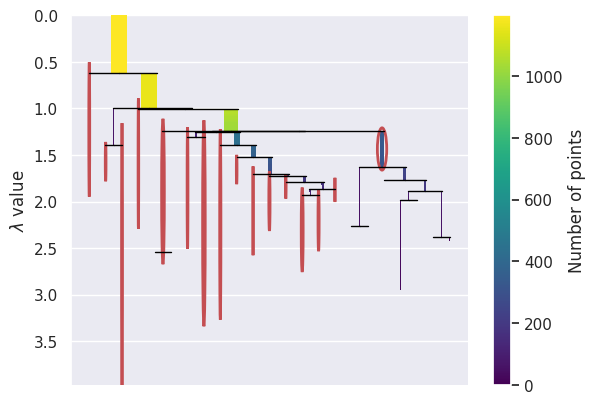

In [367]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [ ]:
import plotly.express as px

In [368]:
assert len(topics) == len(data)

In [369]:
data['Topic'] = topics

In [370]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Contains_Keywords,Topic
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well ...,False,3
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn’ stick ’ used the libre for mon...,False,3
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone...,False,1
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was fir...,False,-1
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused gmi libre finding myself confused...,False,1


In [371]:
data.tail()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Contains_Keywords,Topic
1192,diabetes_t2,2024-01-16 00:00:00,2024-01-16 01:58:00,morning spikes,anyone else get 60/70 point increases in the m...,,,,,,morning spikes anyone else get point increase...,False,1
1193,diabetes_t2,2024-01-17 00:00:00,2024-01-17 04:09:00,this is what severe anxiety does to my blood s...,i did not eat any carbs with either of those ...,,,,,,this what severe anxiety does blood sugar ...,False,1
1194,diabetes,2024-01-16 00:00:00,2024-01-16 09:22:00,i tried having it on my arm just once as sugge...,the filament bent like 15 minutes after i've p...,,,,,,tried having arm just once suggested the...,False,-1
1195,diabetes,2024-01-16 00:00:00,2024-01-16 08:45:00,"mine keeps breaking, on my right arm.",i have had 3 break and stop reading.,,,,,,mine keeps breaking right arm have had bre...,False,2
1196,diabetes,2024-01-16 00:00:00,2024-01-16 16:12:00,i just learned you can buy some supplemental c...,,,,,,,just learned you can buy some supplemental co...,False,2


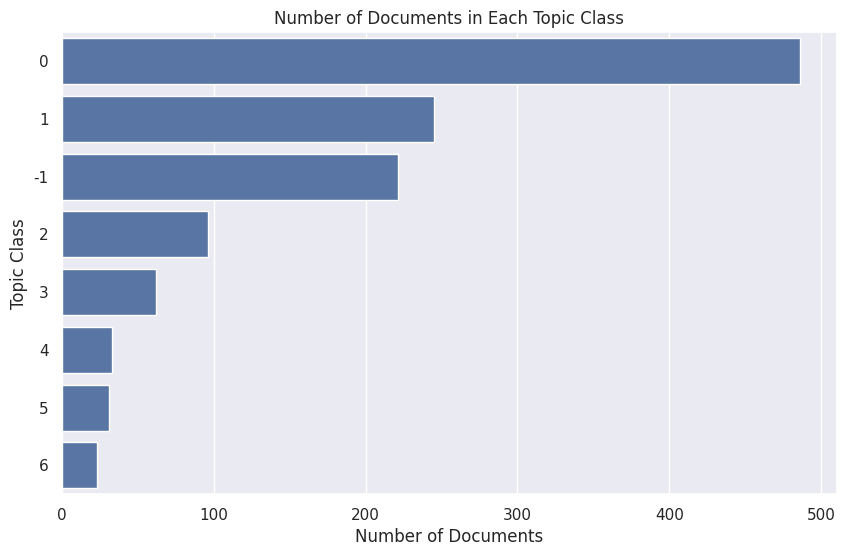

In [372]:
topic_counts = data['Topic'].value_counts()
#data.drop(['Contains_Keywords'], axis=1)
# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=data, order = topic_counts.index)

# Labeling the plot
plt.title('Number of Documents in Each Topic Class')
plt.xlabel('Number of Documents')
plt.ylabel('Topic Class')

# Show the plot
plt.show()

In [373]:
topic_distr, _ = BERTopic_model.approximate_distribution(texts)

100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


In [375]:
BERTopic_model.visualize_distribution(probs[0])

In [376]:
probs

array([[5.23094112e-308, 1.21004872e-307, 9.37395791e-309, ...,
        1.25329847e-308, 7.64164930e-309, 1.13000399e-308],
       [4.85213570e-308, 1.12094079e-307, 8.80272224e-309, ...,
        1.30451623e-308, 7.28537741e-309, 1.05434343e-308],
       [7.49626579e-002, 7.42899983e-001, 2.04153343e-002, ...,
        1.13958289e-002, 1.59925681e-002, 2.80314299e-002],
       ...,
       [1.00449317e-001, 3.12137242e-001, 8.71151354e-002, ...,
        1.38379528e-002, 1.49002291e-001, 6.02033086e-002],
       [7.35818424e-002, 2.12679328e-001, 7.85520823e-002, ...,
        1.08607085e-002, 7.76035461e-002, 3.91580646e-002],
       [6.04162389e-002, 1.73575467e-001, 9.79232775e-002, ...,
        7.91472457e-003, 4.43641455e-002, 4.58236242e-002]])

In [377]:
topic_distr, topic_token_distr = BERTopic_model.approximate_distribution(texts, calculate_tokens=True)
topic_dist_df = BERTopic_model.visualize_approximate_distribution(texts[1], topic_token_distr[1])


100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


In [378]:
topic_dist_df

,libre,doesn,stick,used,the,libre,for,months,off,and,...,for,the,duration,pregnancy,what,gives,please,send,any,advice


# **BERTopic Model Output Evaluation**

# **Coherence**
Measures the degree of semantic similarity between high scoring words in the topic. These measures help distinguish between topics that are semantically interpretable and topics that are artifacts of statistical inference.

C_V Measure: A coherence measure that uses a sliding window, a one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.

In [379]:
coherence = BERTopic_model.get_topic_info(); coherence.head(10)

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,221,-1_normal_better_arm_try,"[normal, better, arm, try, way, well, accurate...","[diabetes, diabetic, diagnosed, alerts, health...","[normal, better, arm, try, accurate, every, lo...",[ and january was ive been for least te...
1,0,486,0_signal_iphone_android_data,"[signal, iphone, android, data, ios, update, s...","[ios, iphone, bluetooth, apps, android, device...","[signal, iphone, android, ios, update, scan, b...",[ just really unlucky with these things used...
2,1,245,1_two_alarm_test_range,"[two, alarm, test, range, see, getting, used, ...","[diabetes, diabetic, diagnosed, sugars, calibr...","[two, alarm, test, range, experience, accurate...",[what does the graph look like nondiabetic ...
3,2,96,2_arm_skin_adhesive_tape,"[arm, skin, adhesive, tape, try, skin tac, tac...","[skin tac, skin grip, skin, tac, arm, applying...","[arm, adhesive, tape, try, skin tac, pain, arm...",[ assume youre using skin tac before applying ...
4,3,62,3_long_pen_need_without,"[long, pen, need, without, better, care, way, ...","[medicaid, care physician, primary care physic...","[long, pen, need, care, way, refill, pocket, a...",[cgm bounce around with the insurance company ...
5,4,33,4_alarm_alarms_sound_set,"[alarm, alarms, sound, set, change, cant, sett...","[change alarms, alarms sound, alarm settings, ...","[alarm, alarms, set, settings, custom, alert, ...",[libre app android alarm sounds the looked ...
6,5,31,5_arm_stomach_placement_thigh,"[arm, stomach, placement, thigh, abdomen, appr...","[pain level insertion, approved arm, chest thi...","[placement, thigh, abdomen, approved, chest, u...",[new libre where’ the best place put good ...
7,6,23,6_compression_lows_sleep_compression lows,"[compression, lows, sleep, compression lows, s...","[compression lows lie, compression lows, sleep...","[compression, lows, compression lows, sleeping...",[night time compression lows this everyone ins...


In [380]:
coherence_df = coherence

In [381]:
coherence_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,221,-1_normal_better_arm_try,"[normal, better, arm, try, way, well, accurate...","[diabetes, diabetic, diagnosed, alerts, health...","[normal, better, arm, try, accurate, every, lo...",[ and january was ive been for least te...
1,0,486,0_signal_iphone_android_data,"[signal, iphone, android, data, ios, update, s...","[ios, iphone, bluetooth, apps, android, device...","[signal, iphone, android, ios, update, scan, b...",[ just really unlucky with these things used...
2,1,245,1_two_alarm_test_range,"[two, alarm, test, range, see, getting, used, ...","[diabetes, diabetic, diagnosed, sugars, calibr...","[two, alarm, test, range, experience, accurate...",[what does the graph look like nondiabetic ...
3,2,96,2_arm_skin_adhesive_tape,"[arm, skin, adhesive, tape, try, skin tac, tac...","[skin tac, skin grip, skin, tac, arm, applying...","[arm, adhesive, tape, try, skin tac, pain, arm...",[ assume youre using skin tac before applying ...
4,3,62,3_long_pen_need_without,"[long, pen, need, without, better, care, way, ...","[medicaid, care physician, primary care physic...","[long, pen, need, care, way, refill, pocket, a...",[cgm bounce around with the insurance company ...
5,4,33,4_alarm_alarms_sound_set,"[alarm, alarms, sound, set, change, cant, sett...","[change alarms, alarms sound, alarm settings, ...","[alarm, alarms, set, settings, custom, alert, ...",[libre app android alarm sounds the looked ...
6,5,31,5_arm_stomach_placement_thigh,"[arm, stomach, placement, thigh, abdomen, appr...","[pain level insertion, approved arm, chest thi...","[placement, thigh, abdomen, approved, chest, u...",[new libre where’ the best place put good ...
7,6,23,6_compression_lows_sleep_compression lows,"[compression, lows, sleep, compression lows, s...","[compression lows lie, compression lows, sleep...","[compression, lows, compression lows, sleeping...",[night time compression lows this everyone ins...


In [382]:
data.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Model Outputs.xlsx')

In [383]:
coherence_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Coherence.xlsx')

# **Generating Labels from Topic Representations using 🤗Transformers**

In [ ]:
from bertopic.representation import TextGeneration
from transformers import pipeline

In [ ]:
representations = coherence['MMR'].tolist()
generator = pipeline('text2text-generation', model='google/flan-t5-base')

In [ ]:
representations

In [ ]:
representations_df = pd.DataFrame(representations)
print(representations_df)

In [ ]:
representations_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Representations.xlsx')

In [ ]:
import json
representations

In [ ]:
def generate_labels(keywords):
    labels = []
    for keyword in keywords:
        # Replace the placeholder with the actual keyword
        prompt = f"I have a topic represented by the following list of keyword: {keyword}. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, where these keywords are from Reddit posts about Continuous Glucose Monitoring sensors, which Diabetics use to help them manage their condition; Summarise the specific nuance described by the representation."
        result = generator(prompt, max_length=50)
        labels.append(result[0]['generated_text'])
    return labels


In [ ]:
topic_labels = generate_labels(keywords_list)

In [ ]:
topic_labels

In [ ]:
#prompt = "I have a topic represented by the following keywords: [KEYWORDS]. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, what is this topic about?"

# Create your representation model
#generator = pipeline('text2text-generation', model='google/flan-t5-base')
#representation_model = TextGeneration(generator, random_state = 42)

# **Topic Overlap**
 Refers to the extent to which topics share the same words. Overlapping topics might suggest that the model is not differentiating topics from each other well.

There is no direct function in BERTopic for measuring overlap, but you can infer it by examining the most important words per topic and see if there are common words across different topics.